## 三層ニューラルネットワーク フルスクラッチ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# シグモイド関数&導関数

sigmoid = lambda x: 1/(1+np.exp(-x))
del_sigmoid = lambda x: sigmoid(x)*(1-sigmoid(x))

In [3]:
# 順伝播

def ForwardPropagation(x, w2, w3):
    z1 = np.insert(np.array([x]).T,0,1,axis=0)
    u2 = np.dot(w2,z1)
    z2 = np.insert(sigmoid(u2),0,1,axis=0)
    u3 = np.dot(w3,z2)
    z3 = u3
    return dict(z1=z1,z2=z2,z3=z3,u2=u2)

In [4]:
# 逆伝播

def BackPropagation(y,w2,w3,z1,z2,z3,u2):
    d3 = (z3 - np.array([y]).T).T
    d2 = np.dot(d3,w3)[:,1:]*del_sigmoid(u2).T
    dw3 = d3.T*z2.T
    dw2 = d2.T*z1.T
    return dict(dw2=dw2,dw3=dw3)

In [5]:
# 確率的勾配降下法

def decent(x,y,w2,w3,epsilon):
    f = ForwardPropagation(x,w2,w3)
    b = BackPropagation(y,w2,w3,f['z1'],f['z2'],f['z3'],f['u2'])
    w2 = w2 - epsilon*b['dw2']
    w3 = w3 - epsilon*b['dw3']
    return dict(w2=w2,w3=w3)


In [6]:
def train(X,Y,n2,epoch,epsilon):
    n1 = len(X[0])
    n3 = len(Y[0])
    w2 = np.random.normal(0,1,(n2,n1))
    w2 = np.insert(w2,0,0,axis=1)
    w3 = np.random.normal(0,1,(n3,n2))
    w3 = np.insert(w3,0,0,axis=1)
    for _ in range(epoch):
        for x,y in zip(X,Y):
            w = decent(x,y,w2,w3,epsilon)
            w2 = w['w2']
            w3 = w['w3']
    return dict(w2=w2,w3=w3)


In [7]:
def predict(x,w2,w3):
    f = ForwardPropagation(x,w2,w3)
    return f['z3']


In [18]:
def f(x):
    return (x-1)**2
X = np.random.uniform(0,2,20)
Y = f(X) + np.random.normal(0,0.1,20)


<function matplotlib.pyplot.show(close=None, block=None)>

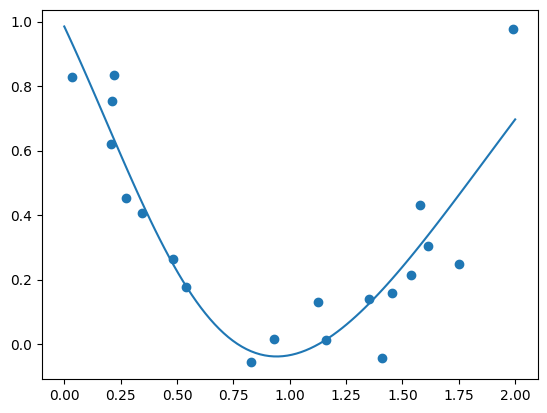

In [17]:
X_train = np.array([X]).T
Y_train = np.array([Y]).T
w = train(X_train, Y_train, 5, 5000, 0.01)
X_test = np.linspace(0,2,100)
Y_test = [predict(x,w["w2"],w["w3"]) for x in X_test]
plt.plot(X_test, Y_test)
plt.scatter(X,Y)
plt.show